In [1]:
import numpy as np
import matplotlib.pyplot as plt
from autoencoder import VAE
from train import load_mnist
from analysis import select_images, plot_reconstructed_images, plot_images_encoded_in_latent_space

In [3]:
autoencoder = VAE.load("model")
x_train, y_train, x_test, y_test = load_mnist()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


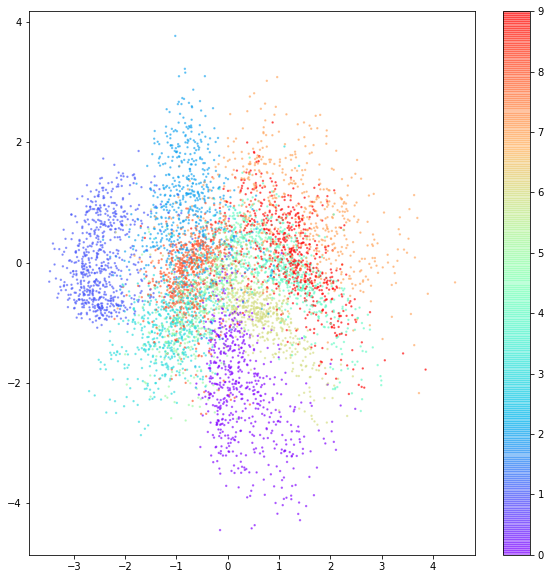

In [4]:
num_sample_images_to_show = 8
num_images = 6000

sample_images, sample_labels = select_images(x_test, y_test, num_images)
_, latent_representations = autoencoder.reconstruct(sample_images)
plot_images_encoded_in_latent_space(latent_representations, sample_labels)

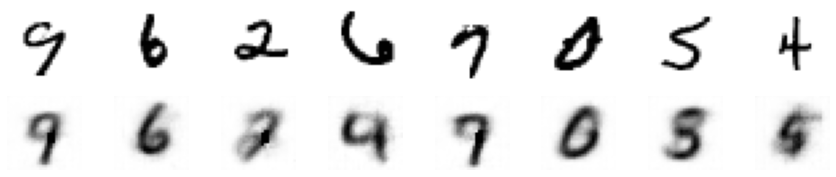

In [5]:
sample_images, _ = select_images(x_test, y_test, num_sample_images_to_show)
reconstructed_images, _ = autoencoder.reconstruct(sample_images)
plot_reconstructed_images(sample_images, reconstructed_images)

## Griffin Lim

In [14]:
import librosa
import librosa.display

In [9]:
y, sr = librosa.load("opm.mp3", mono=True, sr=None, duration=5)

/usr/local/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [28]:
CQT = librosa.cqt(y=y, sr=sr, bins_per_octave=36, n_bins=7*36)
mag, phase = np.abs(CQT), np.angle(CQT)


In [25]:
y_inv = librosa.griffinlim_cqt(C, sr=sr, bins_per_octave=36, n_iter=64)

In [32]:
y_icqt = librosa.icqt(mag, sr=sr, bins_per_octave=36)

[Text(0.5, 1.0, 'Magnitude-only icqt reconstruction')]

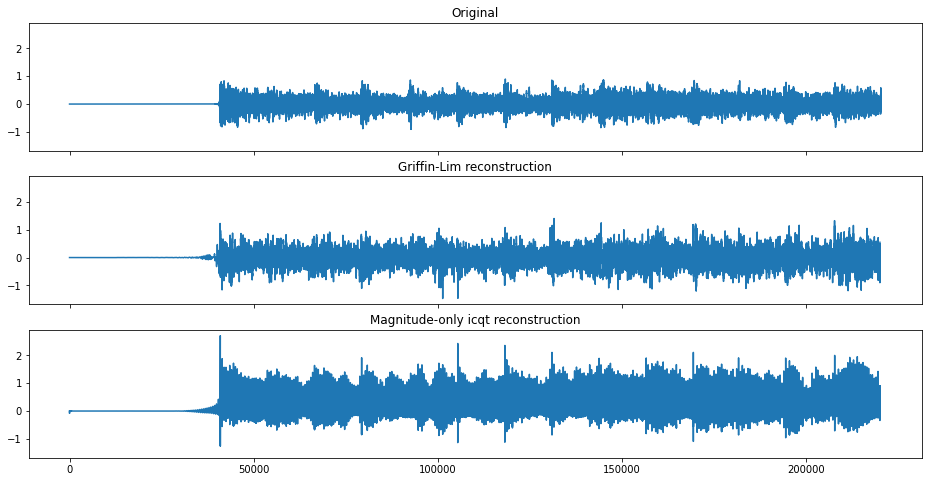

In [33]:
fig, ax = plt.subplots(nrows=3, figsize=(16, 8), sharex=True, sharey=True)
ax[0].plot(y)
ax[0].set(title='Original', xlabel=None)
ax[0].label_outer()
ax[1].plot(y_inv)
ax[1].set(title='Griffin-Lim reconstruction', xlabel=None)
ax[1].label_outer()
ax[2].plot(y_icqt)
ax[2].set(title='Magnitude-only icqt reconstruction')

In [34]:
import IPython.display as ipd

In [35]:
ipd.Audio(y, rate=sr)

In [36]:
ipd.Audio(y_inv, rate=sr)

In [37]:
ipd.Audio(y_icqt, rate=sr)